# Digit recognition using a Convolutional Neural-Network (cnn) approach

In [227]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import operator

(300, 300)

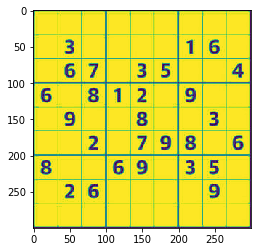

In [298]:
#img = cv2.imread('Resources/sudoku2.png')
img = cv2.imread('Resources/first.jpg')


img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#img = cv2.GaussianBlur(img, (, 7), 0)
#img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
plt.imshow(img)
img.shape

In [299]:
top_left, top_right, bottom_right, bottom_left = [0,0], [img.shape[0]-1,0], [img.shape[0]-1,img.shape[1]-1], [0,img.shape[1]-1]

In [300]:
src = np.array([top_left, top_right, bottom_right, bottom_left], dtype='float32')
src

array([[  0.,   0.],
       [299.,   0.],
       [299., 299.],
       [  0., 299.]], dtype=float32)

In [301]:
def distance_between(p1, p2):
    """Returns the scalar distance between two points"""
    a = p2[0] - p1[0]
    b = p2[1] - p1[1]
    return np.sqrt((a ** 2) + (b ** 2))

In [302]:
side = max([
    distance_between(bottom_right, top_right),
    distance_between(top_left, bottom_left),
    distance_between(bottom_right, bottom_left),
    distance_between(top_left, top_right)
])

In [303]:
img = cv2.resize(img, (288, 288))

In [304]:
side = img.shape[:1]
side = side[0] / 9
side

32.0

In [305]:
(28+2*2)*9

288

In [306]:
squares = []
for j in range(9):
        for i in range(9):
            squares.append(cv2.resize(img[i*int(side)+2:(i+1)*int(side)-2, j*int(side)+2:(j+1)*int(side)-2], (28, 28)))


## CNN mnist method:
The model has been trained on the Google colab notebook and then loaded here.

In [307]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

# num_filters = 8
# filter_size = 3
# pool_size = 2

# Build the model.
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28, 28, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Load the model's saved weights.
model.load_weights('cnn.h5')

In [308]:
def read_number(square):
    num = 0.5 - square/255.
    num0 = np.expand_dims(np.expand_dims(num, axis=0), axis=3)
    return np.argmax(model.predict(num0))    
    
    

In [309]:
Sudoku_out = np.array(list(map(read_number, squares))).reshape((9,9)).transpose()
print(Sudoku_out)

[[0 0 0 0 0 0 0 0 0]
 [0 3 0 0 0 0 1 6 0]
 [0 6 7 0 3 5 0 0 4]
 [6 0 8 1 2 0 9 0 0]
 [0 9 0 0 8 0 0 3 0]
 [0 0 2 0 7 9 8 0 6]
 [8 0 0 6 9 0 3 5 0]
 [0 2 6 0 0 0 0 9 0]
 [0 0 0 0 0 0 0 0 0]]


# Sudoku Solver with Backtracking

In [310]:
def print_puzzle(pz):
    for i in range(len(pz)):
        if i % 3 == 0 and i != 0:
            print("- - - - - - - - - - - - - ")

        for j in range(len(pz[0])):
            if j % 3 == 0 and j != 0:
                print(" | ", end="")

            if j == 8:
                print(pz[i][j])
            else:
                print(str(pz[i][j]) + " ", end="")

In [311]:
def solve(pz):
    find = find_empty(pz)
    if not find:
        return True
    else:
        row, col = find

    for i in range(1,10):
        if valid(pz, i, (row, col)):
            pz[row][col] = i

            if solve(pz):
                return True

            pz[row][col] = 0

    return False


def valid(pz, num, pos):
    # Check row
    for j in range(len(pz[0])):
        if pz[pos[0]][j] == num and pos[1] != j:
            return False

    # Check column
    for i in range(len(pz)):
        if pz[i][pos[1]] == num and pos[0] != i:
            return False

    # Check box
    box_x = pos[1] // 3
    box_y = pos[0] // 3

    for i in range(box_y*3, box_y*3 + 3):
        for j in range(box_x * 3, box_x*3 + 3):
            if pz[i][j] == num and (i,j) != pos:
                return False

    return True


def find_empty(pz):
    for i in range(len(pz)):
        for j in range(len(pz[0])):
            if pz[i][j] == 0:
                return (i, j)  # row, col

    return None

In [312]:
solve(Sudoku_out)
print_puzzle(Sudoku_out)

4 8 9  | 2 6 1  | 5 7 3
2 3 5  | 8 4 7  | 1 6 9
1 6 7  | 9 3 5  | 2 8 4
- - - - - - - - - - - - - 
6 7 8  | 1 2 3  | 9 4 5
5 9 1  | 4 8 6  | 7 3 2
3 4 2  | 5 7 9  | 8 1 6
- - - - - - - - - - - - - 
8 1 4  | 6 9 2  | 3 5 7
7 2 6  | 3 5 8  | 4 9 1
9 5 3  | 7 1 4  | 6 2 8


In [287]:
num = 0.5 - squares[71]/255.

In [288]:
num.sum()

-329.03921568627453

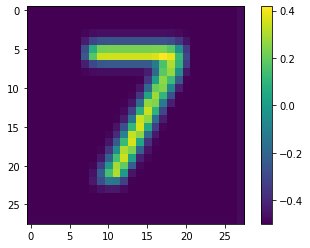

In [289]:
plt.imshow(num)
plt.colorbar()

In [290]:
num0 = np.expand_dims(np.expand_dims(num, axis=0), axis=3)

In [291]:
num0.shape

(1, 28, 28, 1)

In [292]:
model.predict_proba(num0)

array([[3.6517619e-15, 4.9905549e-04, 1.7900894e-04, 9.4866424e-05,
        1.6656135e-06, 2.4176961e-06, 1.5896720e-11, 9.9871325e-01,
        1.3362283e-06, 5.0845632e-04]], dtype=float32)

In [293]:
model.predict_classes(num0)

array([7], dtype=int64)

In [294]:
np.argmax(model.predict(num0))

7